In [2]:
import simexpal
import yaml

cfg = simexpal.config_for_dir()

results = []
for run in cfg.collect_successful_results():
    with run.open_output_file() as f:
        yml = yaml.load(f, Loader=yaml.SafeLoader)
    results.append(yml)

for r in sorted(results, key=lambda r: (r['num_threads'])):
    print('num_threads {} has answer {} and takes: {} ms'.format(
          r['num_threads'], r['result'], r['time']))

num_threads 1 has answer 260219026 and takes: 102971 ms
num_threads 2 has answer 260219026 and takes: 69949 ms
num_threads 4 has answer 260219026 and takes: 91934 ms
num_threads 8 has answer 260219026 and takes: 110958 ms
num_threads 16 has answer 260219026 and takes: 103384 ms
num_threads 32 has answer 260219026 and takes: 166020 ms
num_threads 64 has answer 260219026 and takes: 109935 ms


In [3]:
num_threads = []
result = []
time = []
for r in sorted(results, key=lambda r: (r['num_threads'])):
    num_threads.append(r['num_threads'])
    result.append(r['result'])
    time.append(r['time'])
    

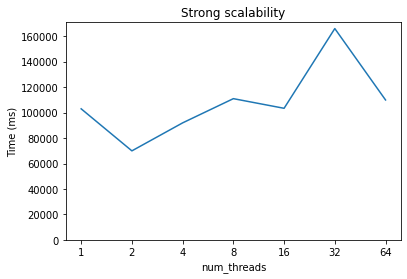

In [6]:
import matplotlib.pyplot as plt
fig, plts = plt.subplots()
plts.plot(num_threads, time)
plts.set_ylim(ymin=0)
plts.set_title('Strong scalability')
plts.set_ylabel('Time (ms)')
plts.set_xlabel('num_threads')
plts.set_xscale('log', base=2)
plts.set_xticks([1, 2, 4, 8, 16, 32, 64])
plts.set_xticklabels([1, 2, 4, 8, 16, 32, 64])
fig.savefig('plot_5b.pdf', bbox_inches='tight')